CSCI P-556: Applied Machine Learning

Fall 2019

Assignment 4

Due: 11:59PM, December 6, 2019

Read dataset

In [0]:
import pandas as pd
train = pd.read_csv('a4-train.csv', index_col=0)
test = pd.read_csv('a4-test.csv', index_col=0)

Task 1: Perform exploratory data analysis (15 points)

In [2]:
train.describe()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_461,feat_462,feat_463,feat_464,feat_465,feat_466,feat_467,feat_468,feat_469,feat_470,feat_471,feat_472,feat_473,feat_474,feat_475,feat_476,feat_477,feat_478,feat_479,feat_480,feat_481,feat_482,feat_483,feat_484,feat_485,feat_486,feat_487,feat_488,feat_489,feat_490,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499,labels
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,...,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,481.722500,483.452500,510.166000,483.384500,501.612500,479.259000,480.109500,476.565000,486.793500,478.78900,486.517500,490.653500,478.164500,481.524500,485.038500,479.423500,479.287000,494.947500,484.173000,477.42700,484.714500,494.239000,476.573000,479.260500,499.40750,504.719000,484.783500,482.099500,480.597500,491.914500,481.931500,500.03700,500.609500,489.545500,486.713000,489.128000,479.046000,480.670000,479.80000,476.153000,...,482.687000,494.427500,480.42850,485.115000,490.432000,480.842500,510.821000,481.478000,481.114000,516.0075,478.712000,480.398000,477.640500,479.41100,486.371000,481.366000,487.73500,483.676000,486.63200,485.496500,478.457500,477.360500,497.970000,501.877000,482.779000,478.715500,482.569500,489.91150,479.621500,482.458500,478.811500,486.356500,496.565500,493.49950,510.893000,478.219500,483.309000,507.977000,490.266000,0.500000
std,6.421769,30.186294,38.899165,9.059895,41.389418,6.795956,40.575925,1.384461,15.043836,7.19092,36.556831,28.198404,34.169434,42.617385,12.135224,21.984604,13.483602,30.339495,23.369449,9.95717,12.724305,22.344295,6.840326,9.641946,44.24758,28.529686,21.573278,11.934899,14.703897,21.965323,7.669173,36.48356,36.198953,40.756024,23.433762,42.795845,11.490818,22.903873,4.72029,1.581721,...,23.029638,33.847179,42.93293,17.124526,19.666794,8.427823,36.269887,19.462988,40.267713,40.8088,4.541957,44.456189,1.787696,6.38157,74.518547,15.903317,17.02318,37.987953,11.69581,19.957333,27.820985,9.774779,34.666092,35.628971,11.275936,10.149387,34.051431,22.72965,8.864622,20.890033,4.011735,23.967366,127.635442,34.81902,37.459353,5.880613,13.559847,37.224297,25.825273,0.500125
min,462.000000,381.000000,370.000000,453.000000,371.000000,459.000000,334.000000,471.000000,430.000000,455.00000,354.000000,389.000000,347.000000,352.000000,444.000000,410.000000,433.000000,377.000000,408.000000,441.00000,426.000000,412.000000,456.000000,438.000000,343.00000,416.000000,421.000000,441.000000,438.000000,417.000000,451.000000,382.00000,369.000000,363.000000,384.000000,342.000000,441.000000,396.000000,464.00000,471.000000,...,403.000000,379.000000,347.00000,424.000000,426.000000,452.000000,364.000000,408.000000,333.000000,398.0000,464.000000,347.000000,472.000000,455.00000,276.000000,428.000000,423.00000,347.000000,450.00000,418.000000,391.000000,439.000000,375.000000,376.000000,444.000000,444.0000

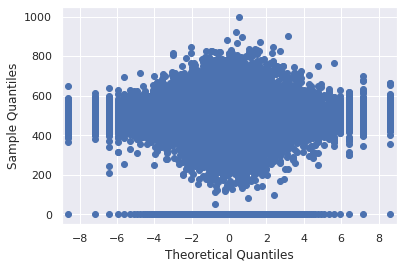

In [53]:
# Some python implementation of EDA is refernced from https://seaborn.pydata.org/ and https://matplotlib.org/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from scipy import stats

fig = sm.qqplot(train, stats.t, distargs=(4,))
plt.show()

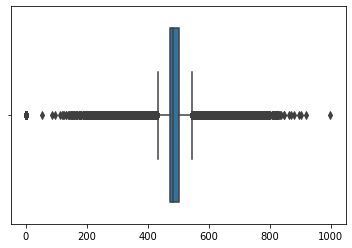

In [7]:
sb.boxplot(train)

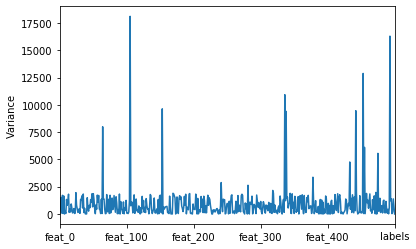

In [8]:
train.var().plot()
plt.ylabel('Variance')
plt.show()

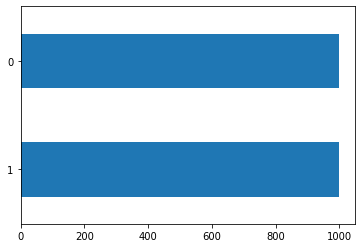

In [10]:
train['labels'].value_counts().plot(kind='barh')

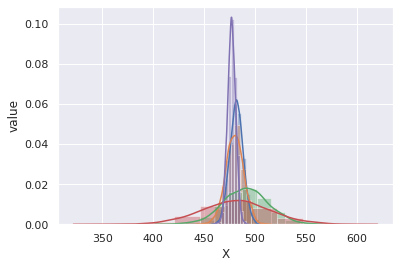

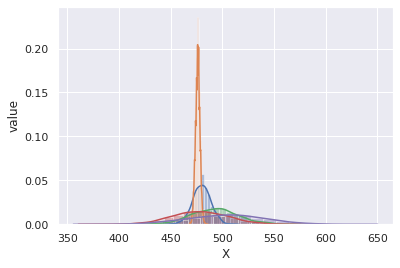

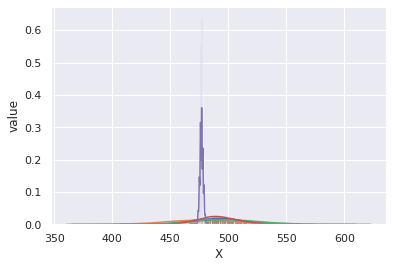

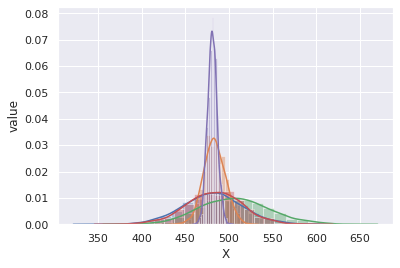

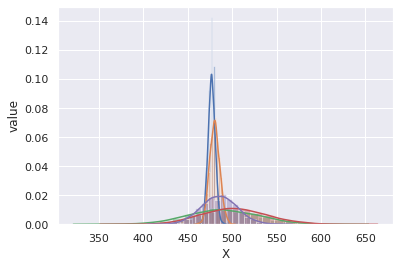

In [11]:
c = list(train.columns)
# sb.set(rc={"figure.figsize": [8,5]})
# sb.distplot(train, norm_hist=False, kde=True, bins=20,)
# plt.show

for i in range(0,500,100):
  z = c[i]
  sb.set(rc={"figure.figsize": [6,4]})
  sb.distplot(train[z], norm_hist=False, kde=True, bins=10,
  ).set(xlabel='X', ylabel='value');
plt.show()

for i in range(100,200,20):
  z = c[i]
  sb.set(rc={"figure.figsize": [6,4]})
  sb.distplot(train[z], norm_hist=False, kde=True, bins=20,
  ).set(xlabel='X', ylabel='value');
plt.show()

for i in range(200,300,20):
  z = c[i]
  sb.set(rc={"figure.figsize": [6,4]})
  sb.distplot(train[z], norm_hist=False, kde=True, bins=20,
  ).set(xlabel='X', ylabel='value');
plt.show()

for i in range(300,400,20):
  z = c[i]
  sb.set(rc={"figure.figsize": [6,4]})
  sb.distplot(train[z], norm_hist=False, kde=True, bins=20,
  ).set(xlabel='X', ylabel='value');
plt.show()

for i in range(400,500,20):
  z = c[i]
  sb.set(rc={"figure.figsize": [6,4]})
  sb.distplot(train[z], norm_hist=False, kde=True, bins=20,
  ).set(xlabel='X', ylabel='value');
plt.show()

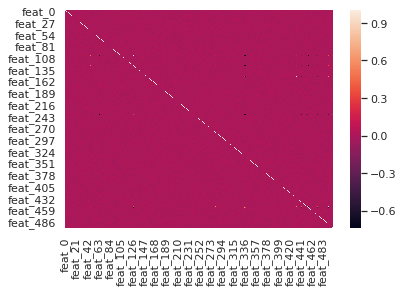

In [12]:
c = train.corr()
sb.heatmap(c)


Task 2: Use scikit-learn's logistic regression to establish a baseline model. We are not expecting this model to perform well, we just want to know what is the highest accuracy that we can achieve without doing any feature engineering and/or parameter tuning. (5 points)

In [20]:
X_train = train.iloc[:,:500]
y_train = train.iloc[:,500]
X_test = test.iloc[:,:500]
y_test = test.iloc[:,500]
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=500).fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

57.833333333333336


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Task 3: Feature engineering. On this task you'll write code to modify your features such that the model can achieve a higher accuracy. You are free to modify the data as you want, but a rationale has to be provided for each modification. Additionally, if you are using anything that has not been convered in class, write a brief description of how the function works. Note that copy/pasting a function's docstring is not what we are asking and we will take off points if this is what you do. (20 points)

Step 1) Data Transformation:

First in order to transform data, I tried log transformation but the data was already normally distributed so it didnt make any difference. I tried the square root or cube root transformation but it reduced the magnitude of values significantly so were actually decreasing accuracy. I finalised the transformation by taking the square of the given values.

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

print(train.duplicated())
print(train.isna())

# X_train = np.log1p(X_train)
# X_test = np.log1p(X_test)

# X_train = np.sqrt(X_train)
# X_test = np.sqrt(X_test)

# X_train = np.power(X_train,0.3)
# X_test = np.power(X_test,0.3)

X_train = np.power(X_train,2)
X_test = np.power(X_test,2)

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool
      feat_0  feat_1  feat_2  feat_3  ...  feat_497  feat_498  feat_499  labels
0      False   False   False   False  ...     False     False     False   False
1      False   False   False   False  ...     False     False     False   False
2      False   False   False   False  ...     False     False     False   False
3      False   False   False   False  ...     False     False     False   False
4      False   False   False   False  ...     False     False     False   False
...      ...     ...     ...     ...  ...       ...       ...       ...     ...
1995   False   False   False   False  ...     False     False     False   False
1996   False   False   False   False  ...     False     False     False   False
1997   False   False   False   False  ...     False     False     False   False
1998   False   False

Step 2) Feature Scaling:

In order to scale data,I tried the three scaling algorithms. The Min-max scaling gave much better results for all the algorithms but was performing pretty badly for SVM. Standard Scaler out of all gave a better and consistent performance on all the models

In [0]:
sc = StandardScaler().fit(X_train)
X_train0 = sc.transform(X_train)
X_test0 = sc.transform(X_test)

# mn = MinMaxScaler().fit(X_train)
# X_train0 = mn.transform(X_train)
# X_test0 = mn.transform(X_test)

# rs = RobustScaler().fit(X_train)
# X_train0 = rs.transform(X_train)
# X_test0 = rs.transform(X_test)

Step 3) Dimension Reduction:

In order t reduce the number and consider only the features which contribute most to the target variable, I used the Univariate feature selection from the sklearn library. However, it works only on positive data and the scaled data had negative values. Hence, I discarded that and used Principal Component Analysis. I tried PCA using different number of columns and finally 6 columns was giving optimal results for the data.

In [0]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# X_train1 = SelectKBest(chi2, k=10).fit_transform(X_train, y_train)
# X_test1 = SelectKBest(chi2, k=10).fit_transform(X_test, y_test)

# for i in range(1,50,2):
pca = PCA(n_components=6)
X_train1 = pca.fit_transform(X_train0)
X_test1 = pca.transform(X_test0)

In [36]:
lr = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=500)
lr.fit(X_train1,y_train)
y_pred = lr.predict(X_test1)
print(accuracy_score(y_test,y_pred)*100)

58.833333333333336


Task 4: Model building & evaluation. Train at least 4 models:


1.   Neural network (any type of NN is fine)
2.   Decision tree (can be a plain decision tree, random forest, gradient boosted trees, etc.)
3.   Support vector machine
4.   Your choice of Naive Bayes or K-nearest neighbors

For model 4, briefly (no more than 2 paragraphs) describe how the model works. 

Part of your grade will depend on how your best model performs against the best model of all the classmates, as determined by the accuracy achieved using the test set. You are encouraged to share your best model's accuracy on Piazza, but not which feature engineering or model tuning steps you took to achieve it. (60 points)

In [25]:
#All The below algorithms are referenced from Sklearn documentation

from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='adam', max_iter=800, activation='relu', alpha = 0.0001, hidden_layer_sizes=(256, 2), random_state=None)
NN.fit(X_train1, y_train)
y_pred = NN.predict(X_test1)
print(accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))

83.16666666666667
[[226  74]
 [ 27 273]]


In [44]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier(n_estimators=100, criterion='gini', max_features='auto',random_state=None)
dt.fit(X_train1, y_train)
y_pred = dt.predict(X_test1)
print(accuracy_score(y_test,y_pred)*100)

80.16666666666666


In [52]:
from sklearn.svm import SVC
svm = SVC(gamma='auto')
svm.fit(X_train1, y_train) 
SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, 
    cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr',random_state=None)
y_pred = svm.predict(X_test1)
print(accuracy_score(y_test,y_pred)*100)

83.16666666666667


In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train1, y_train)
y_pred = knn.predict(X_test1)
print(accuracy_score(y_test,y_pred)*100)

84.0


The K-nearest neighbors is a non-parametric algorithm which means it makes less assumptionas about the data but is computationally slower. It can be used for both classification and regression problems. It lies on only one assumption that things which are similar lies close to each other in space. First, while training the KNN groups all the data points based on the class they belong to. A value of k is provided by the user which can be anything. Whenever a new data point comes while testing, it maps that point to the same space. Now based on the Euclidian distance, it considers the k-closest neighbors around the data point. Now the class to which all these k-neighbors belong is calculated and the class having maximum number is selected as the predicted class.